In [93]:
# 5DATA002W.2 Machine Learning & Data Mining
# Coursework - Python Notebook 2: Classification Modelling and Hyperparameters Tunning
# Author: Senuri Hansamini Wedamulla
# Peer Reviewer: Madana Madana Yasara
# Review Date: 11.03.2025

In [94]:
# This code was reused from Code Reuse Session 2, Item 1
#import pandas
import pandas as pd

In [95]:
# This code was reused from Code Reuse Session 2, Item 2
#load prepared dataset file
data = pd.read_csv('/content/drive/MyDrive/IIT/LEVEL 5/ML/CW/ Prepared_Coursework_Dataset_Notebook1.csv')

In [96]:
# This code was reused from Code Reuse Session 2, Item 3
# reading the data
data.head(15)

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,2,2,3,0,2,1,35,1,1,14,5,62,1
2,58,3,3,5,0,2,1,63,1,1,14,7,75,1
3,58,1,1,1,1,3,1,18,1,1,2,1,84,1
4,47,2,1,2,1,3,1,41,1,1,3,1,50,1
5,51,1,1,1,0,2,1,20,1,1,18,2,89,1
6,51,1,1,1,3,1,1,8,1,1,11,1,54,1
7,40,2,1,2,0,2,1,30,1,1,9,1,14,0
8,40,4,3,5,1,3,1,103,1,1,20,18,70,1
9,69,4,3,5,3,1,0,32,1,1,21,12,92,1


In [97]:
# This code was reused from Code Reuse Session 2, Item 4
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4015 non-null   int64
 1   T_Stage                 4015 non-null   int64
 2   N_Stage                 4015 non-null   int64
 3   6th_Stage               4015 non-null   int64
 4   Differentiated          4015 non-null   int64
 5   Grade                   4015 non-null   int64
 6   A_Stage                 4015 non-null   int64
 7   Tumor_Size              4015 non-null   int64
 8   Estrogen_Status         4015 non-null   int64
 9   Progesterone_Status     4015 non-null   int64
 10  Regional_Node_Examined  4015 non-null   int64
 11  Reginol_Node_Positive   4015 non-null   int64
 12  Survival_Months         4015 non-null   int64
 13  Mortality_Status        4015 non-null   int64
dtypes: int64(14)
memory usage: 439.3 KB


In [98]:
# This code was reused from Code Reuse Session 1, Item 8
#describing variables
data.describe()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000
mean,53.993524,1.783562,1.437111,2.319303,0.689166,2.151183,0.977335,30.362889,0.933001,0.826899,14.364882,4.147198,71.301121,0.846824
std,8.971774,0.764971,0.692668,1.265527,1.015338,0.637874,0.148852,20.896703,0.250051,0.378382,8.128184,5.094083,22.921993,0.360202
min,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,1.000000
50%,54.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,1.000000
75%,61.000000,2.000000,2.000000,3.000000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,1.000000
max,89.000000,4.000000,3.000000,5.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


In [99]:
# This code was reused from Code Reuse Session 2, Item 5
#method to control the rows and columns truncation in your coursework dataset.
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 150)

In [100]:
# This code was reused from Code Reuse Session 2, Item 6
#declaring input variables (input features) and output variable (target feature)
feature_cols = [
    'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
    'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
    'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive'
]

X = data[feature_cols]
y = data['Mortality_Status']

In [101]:
# This code was reused from Code Reuse Session 2, Item 7
# Initiate a Python library module and function that allows randomly sampling training and test subsets.
from sklearn.model_selection import train_test_split

In [102]:
# This code was reused from Code Reuse Session 2, Item 8
# samples dataset into training and test subsets with a ratio of your choice and ensures the reproducibility of the sampling output.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= 42, stratify=y)

In [103]:
# This code was reused from Code Reuse Session 2, Item 9
#machine learning library to initiate the Logistic Regression modelling algorithm.
from sklearn.linear_model import LogisticRegression

In [104]:
# This code was reused from Code Reuse Session 2, Item 10
#declares Logistic Regression modelling algorithm
logreg = LogisticRegression()

In [105]:
# This code was reused from Code Reuse Session 2, Item 11
#estimates logreg algorithm learnable parameters using the desired sampled dataset.
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
# This code was reused from Code Reuse Session 2, Item 12
#apply model to make predictions
y_pred_train=logreg.predict(X_train)

In [107]:
 # This code was reused from Code Reuse Session 2, Item 13
 # predicting mortality status for new patients
 y_pred=logreg.predict(X_test)

In [108]:
# This code was reused from Code Reuse Session 2, Item 14
#compare each patient's mortality status to those predicted by the model.
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})

Comparison_df

,Actual,Predicted
2721,1,1
197,1,1
3241,0,1
1300,1,1
1832,1,1
...,...,...
3105,1,1
104,0,1
2973,1,1
3751,1,1


In [109]:
# This code was reused from Code Reuse Session 2, Item 15
#calculate the accuracy score training patients subset
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_train)

print ("the accuracy is: ", accuracy)

the accuracy is:  0.8508717310087173


In [110]:
# This code was reused from Code Reuse Session 2, Item 16
# calculate the accuracy score of mortality status of new cancer patients
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print ("The accuracy is: ", accuracy)

The accuracy is:  0.8518057285180572


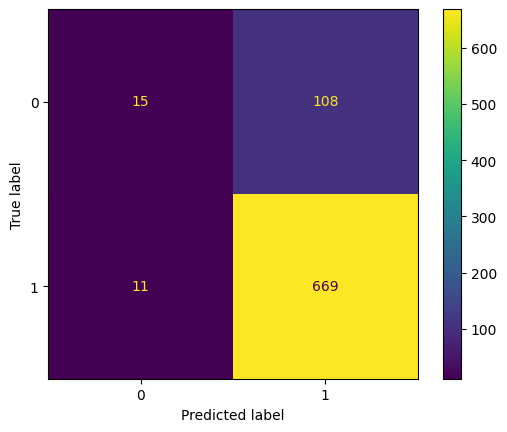

In [111]:
# This code was reused from Code Reuse Session 2, Item 17
#calculate the create a confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)

disp.plot()

In [112]:
# This code was reused from Code Reuse Session 2, Item 18
# examine other foundation-combined performance metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.12      0.20       123
           1       0.86      0.98      0.92       680

    accuracy                           0.85       803
   macro avg       0.72      0.55      0.56       803
weighted avg       0.82      0.85      0.81       803



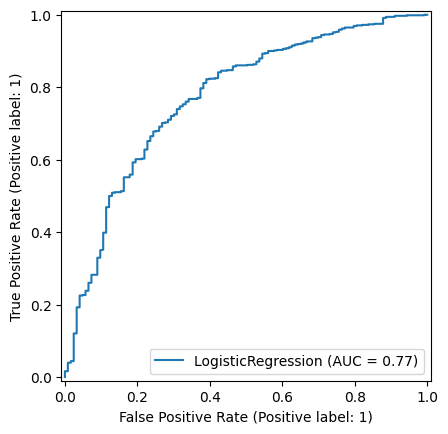

In [113]:
# This code was reused from Code Reuse Session 2, Item 19
# examine further graphical performance metrics
from sklearn.metrics import RocCurveDisplay

logreg_ROC = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [114]:
# This code was reused from Code Reuse Session 2, Item 20
# initiate a machine learning library and function to use the KNN modelling algorithm.
from sklearn.neighbors import KNeighborsClassifier

In [115]:
 # This code was reused from Code Reuse Session 2, Item 21
 #declares K-Nearest Neighbour modelling algorithm
 knn = KNeighborsClassifier(n_neighbors = 5)

In [116]:
# This code was reused from Code Reuse Session 2, Item 22
# builds K-Nearest Neighbour model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
 # This code was reused from Code Reuse Session 2, Item 23
# model predicts the mortality status of the patients in the isolated data subset.
y_pred_knn = knn.predict(X_test)

In [118]:
# This code was reused from Code Reuse Session 2, Item 16
# calculate the accuracy score of mortality status of new cancer patients
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print ("The accuracy is: ", accuracy_knn)

The accuracy is:  0.8331257783312578


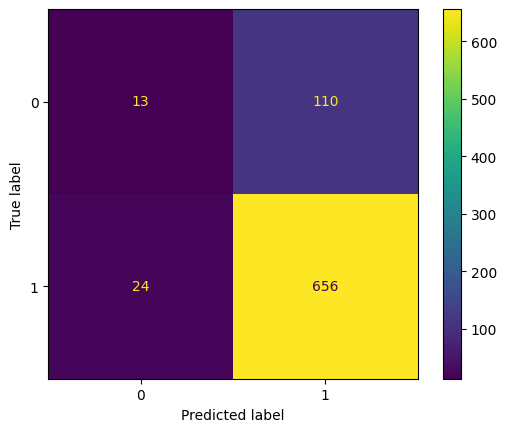

In [119]:
# This code was reused from Code Reuse Session 2, Item 17
#calculate the create a confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn, labels = knn.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)

disp.plot()

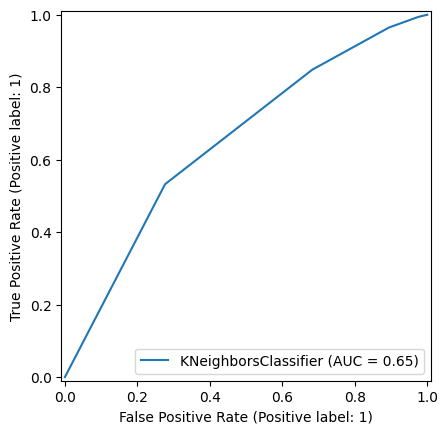

In [120]:
# This code was reused from Code Reuse Session 2, Item 19
# examine further graphical performance metrics
from sklearn.metrics import RocCurveDisplay

knn_ROC = RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [121]:
# This code was reused from Code Reuse Session 2, Item 18
# examine other foundation-combined performance metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.35      0.11      0.16       123
           1       0.86      0.96      0.91       680

    accuracy                           0.83       803
   macro avg       0.60      0.54      0.53       803
weighted avg       0.78      0.83      0.79       803



In [122]:
# This code was reused from Code Reuse Session 2, Item 24
# initiates a suitable library and a nested cross-validation algorithm
from sklearn.model_selection import GridSearchCV

In [123]:
# This code was reused from Code Reuse Session 2, Item 25
# tunes model's hyperparameters and displays the best combination of hyperparameters using desired data subset.
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [124]:
# This code was reused from Code Reuse Session 2, Item 26
#using built model with optimised hyperparameters to predict mortality status on test data subset.
y_pred_knn_gscv = knn_gscv.predict(X_test)

In [125]:
# This code was reused from Code Reuse Session 2, Item 16
# calculate the accuracy score of mortality status of new cancer patients
from sklearn.metrics import accuracy_score

accuracy_knn_gscv = accuracy_score(y_test, y_pred_knn_gscv)

print ("The accuracy is: ", accuracy_knn_gscv)

The accuracy is:  0.8480697384806973


In [126]:
# This code was reused from Code Reuse Session 2, Item 18
# examine other foundation-combined performance metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn_gscv))

              precision    recall  f1-score   support

           0       0.67      0.02      0.03       123
           1       0.85      1.00      0.92       680

    accuracy                           0.85       803
   macro avg       0.76      0.51      0.47       803
weighted avg       0.82      0.85      0.78       803



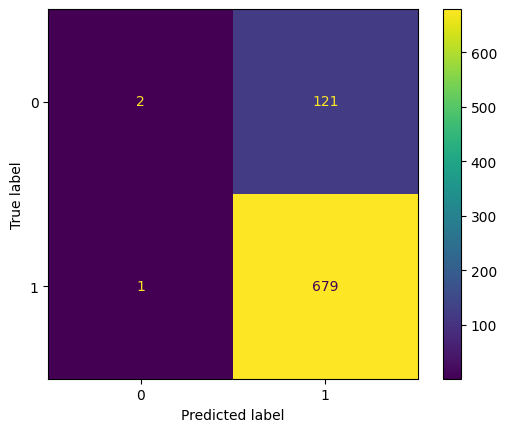

In [137]:
# This code was reused from Code Reuse Session 2, Item 17
#calculate the create a confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn_gscv, labels = knn_gscv.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = knn_gscv.classes_)

disp.plot()

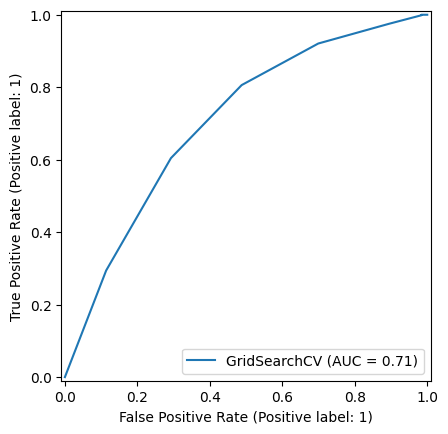

In [140]:
# This code was reused from Code Reuse Session 2, Item 19
# examine further graphical performance metrics
from sklearn.metrics import RocCurveDisplay

knn_gscv_ROC = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)

In [128]:
# This code was reused from Code Reuse Session 2, Item 27
#build a Naive Bayes classification model.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [129]:
# This code was reused from Code Reuse Session 2, Item 26
# using built model with optimised hyperparameters to predict mortality status on test data subset.
y_pred_nb = nb.predict(X_test)

In [139]:
# This code was reused from Code Reuse Session 2, Item 16
# calculate the accuracy score of mortality status of new cancer patients
from sklearn.metrics import accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print ("The accuracy is: ", accuracy_nb)

The accuracy is:  0.7982565379825654


In [131]:
# This code was reused from Code Reuse Session 2, Item 18
# examine other foundation-combined performance metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.37      0.46      0.41       123
           1       0.90      0.86      0.88       680

    accuracy                           0.80       803
   macro avg       0.63      0.66      0.64       803
weighted avg       0.82      0.80      0.81       803



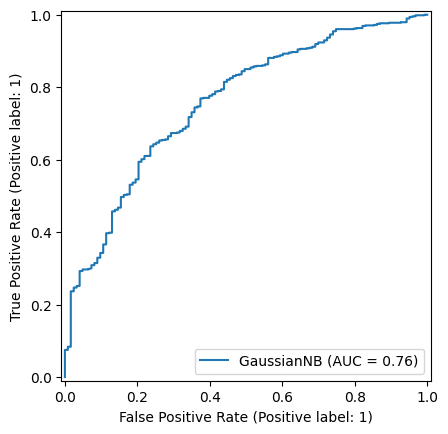

In [138]:
# This code was reused from Code Reuse Session 2, Item 19
# examine further graphical performance metrics
from sklearn.metrics import RocCurveDisplay

nb_ROC = RocCurveDisplay.from_estimator(nb, X_test, y_test)